In [1]:
#Importing Libraries

#import sys
#!{sys.executable} -m pip install pandas
import pandas as pd

#import sys
#!{sys.executable} -m pip install numpy
import numpy as np

#import sys
#!{sys.executable} -m pip install yahoofinancials
from yahoofinancials import YahooFinancials

#import sys
#!{sys.executable} -m pip install xlrd
import xlrd as xls

#import sys
#!{sys.executable} -m pip install openpyxl
import openpyxl as oplx

#import sys
#!{sys.executable} -m pip install seaborn
import seaborn; seaborn.set()

#import sys
#!{sys.executable} -m pip install scikit-learn
from sklearn.metrics import mean_squared_error

#import sys
#!{sys.executable} -m pip install matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
ticker_details = pd.read_excel("Tickers_List.xlsx")
ticker_details.head()

,Ticker,Description
0,GC=F,Gold


In [3]:
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()

In [4]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
end_date= "2021-03-10"
start_date = "2000-09-01"
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [5]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date, "daily")
    #try:
    df = pd.DataFrame(type(raw_data).__getitem__(raw_data, i)['prices'])[['formatted_date','adjclose']]
    #print(i+' Working')
    #except TypeError:
    #print(i+'not working')
    df.columns = ['Date1',i]
    df['Date1']= pd.to_datetime(df['Date1'])
    values = values.merge(df,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)

In [6]:
#convert Date into DateTime
values['Date']=pd.to_datetime(values['Date'])
values.set_index('Date',inplace=True)
print(values)

                   GC=F
Date                   
2000-09-01   277.000000
2000-09-04          NaN
2000-09-05   275.799988
2000-09-06   274.200012
2000-09-07   274.000000
...                 ...
2021-03-04  1700.199951
2021-03-05  1698.000000
2021-03-08  1677.699951
2021-03-09  1716.599976
2021-03-10          NaN

[5354 rows x 1 columns]


In [7]:
end_date

'2021-03-10'

In [8]:
end = pd.Timestamp(end_date)
end

Timestamp('2021-03-10 00:00:00')

In [9]:
table = pd.read_excel("Step_Sheet.xlsx")
table.head()

,Steps,Date,num
0,1,2021-01-01,1
1,2,2021-01-02,2
2,3,2021-01-03,3
3,4,2021-01-04,4
4,5,2021-01-05,5


In [10]:
table.shape

(365, 3)

In [11]:
table.dtypes

Steps             int64
Date     datetime64[ns]
num               int64
dtype: object

In [12]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Steps   365 non-null    int64         
 1   Date    365 non-null    datetime64[ns]
 2   num     365 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.7 KB


In [13]:
table

,Steps,Date,num
0,1,2021-01-01,1
1,2,2021-01-02,2
2,3,2021-01-03,3
3,4,2021-01-04,4
4,5,2021-01-05,5
...,...,...,...
360,361,2021-12-27,361
361,362,2021-12-28,362
362,363,2021-12-29,363
363,364,2021-12-30,364


In [14]:
tab = table.set_index("num", drop = True)
tab

,Steps,Date
num,,
1,1,2021-01-01
2,2,2021-01-02
3,3,2021-01-03
4,4,2021-01-04
5,5,2021-01-05
...,...,...
361,361,2021-12-27
362,362,2021-12-28
363,363,2021-12-29


In [15]:
tab.shape

(365, 2)

In [16]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Steps   365 non-null    int64         
 1   Date    365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [17]:
tab.dtypes

Steps             int64
Date     datetime64[ns]
dtype: object

In [18]:
for i in tab.index:
    if(tab['Date'][i]==end):
        s=tab['Steps'][i]
        break

In [19]:
s

69

In [20]:
var = tab.iloc[s-1:]

In [21]:
var

,Steps,Date
num,,
69,69,2021-03-10
70,70,2021-03-11
71,71,2021-03-12
72,72,2021-03-13
73,73,2021-03-14
...,...,...
361,361,2021-12-27
362,362,2021-12-28
363,363,2021-12-29


In [22]:
count = 0
for i in var.index:
    var['Steps'][i] = count+1
    count = count+1

<ipython-input-22-8b4ebc006667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var['Steps'][i] = count+1
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
var

,Steps,Date
num,,
69,1,2021-03-10
70,2,2021-03-11
71,3,2021-03-12
72,4,2021-03-13
73,5,2021-03-14
...,...,...
361,293,2021-12-27
362,294,2021-12-28
363,295,2021-12-29


In [24]:
values.head()

,GC=F
Date,
2000-09-01,277.000000
2000-09-04,NaN
2000-09-05,275.799988
2000-09-06,274.200012
2000-09-07,274.000000


In [25]:
values.tail()

,GC=F
Date,
2021-03-04,1700.199951
2021-03-05,1698.000000
2021-03-08,1677.699951
2021-03-09,1716.599976
2021-03-10,NaN


In [26]:
values.dtypes

GC=F    float64
dtype: object

In [27]:
values.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5354 entries, 2000-09-01 to 2021-03-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GC=F    5113 non-null   float64
dtypes: float64(1)
memory usage: 83.7 KB


In [28]:
values.describe()

,GC=F
count,5113.000000
mean,1005.119499
std,483.183174
min,255.100006
25%,468.299988
50%,1161.699951
75%,1324.500000
max,2051.500000


In [29]:
data = values.sort_index()

In [30]:
data.shape

(5354, 1)

In [31]:
gold = data.dropna()

In [32]:
gold.shape

(5113, 1)

In [33]:
gold.head()

,GC=F
Date,
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012
2000-09-07,274.000000
2000-09-08,273.299988


In [34]:
gold.tail()

,GC=F
Date,
2021-03-03,1715.300049
2021-03-04,1700.199951
2021-03-05,1698.000000
2021-03-08,1677.699951
2021-03-09,1716.599976


Text(0, 0.5, 'Daily Gold Price')

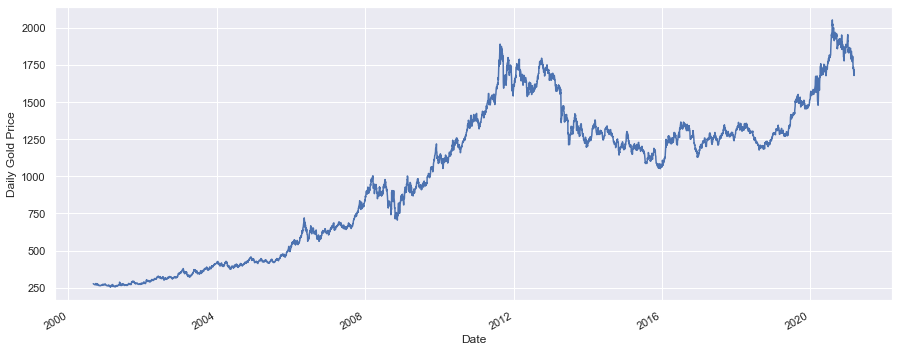

In [35]:
gold['GC=F'].plot()
plt.ylabel("Daily Gold Price")

In [36]:
data = gold['GC=F']

In [37]:
data.head()

Date
2000-09-01    277.000000
2000-09-05    275.799988
2000-09-06    274.200012
2000-09-07    274.000000
2000-09-08    273.299988
Name: GC=F, dtype: float64

Text(0, 0.5, 'Weekly Gold Price')

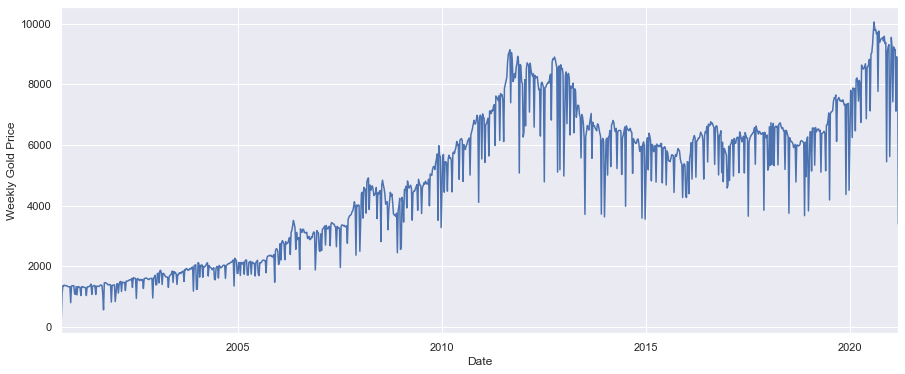

In [38]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel("Weekly Gold Price")

<AxesSubplot:xlabel='Date'>

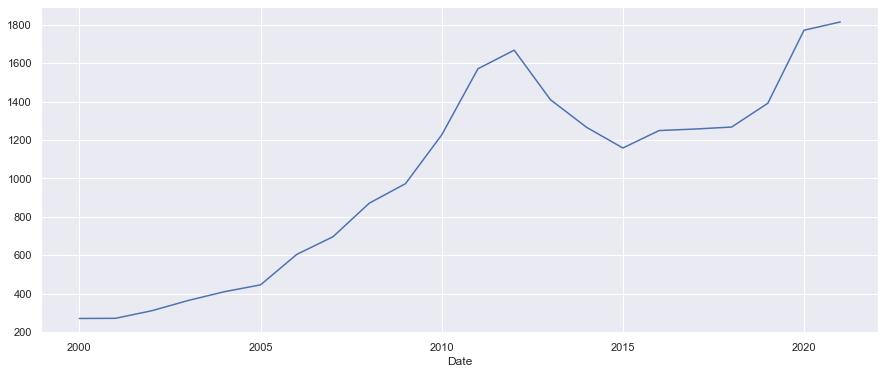

In [39]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

<AxesSubplot:>

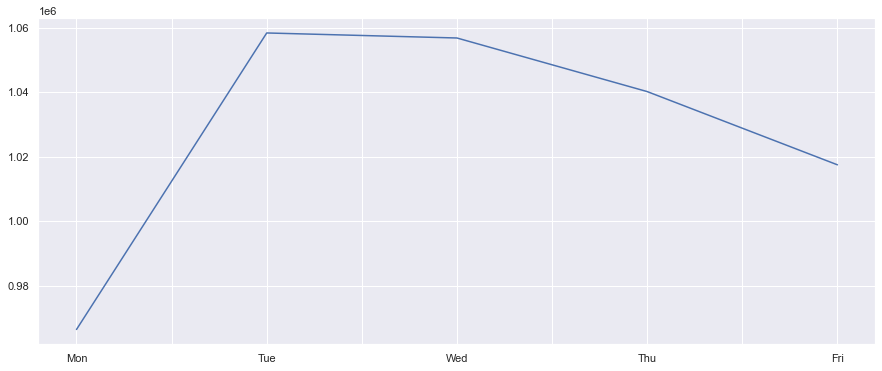

In [40]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon','Tue','Wed','Thu','Fri']
by_weekday.plot()

<AxesSubplot:xlabel='Date'>

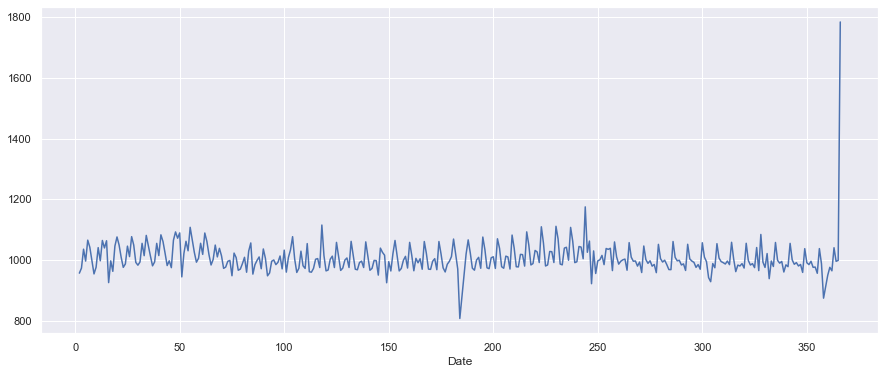

In [41]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

<AxesSubplot:xlabel='Date'>

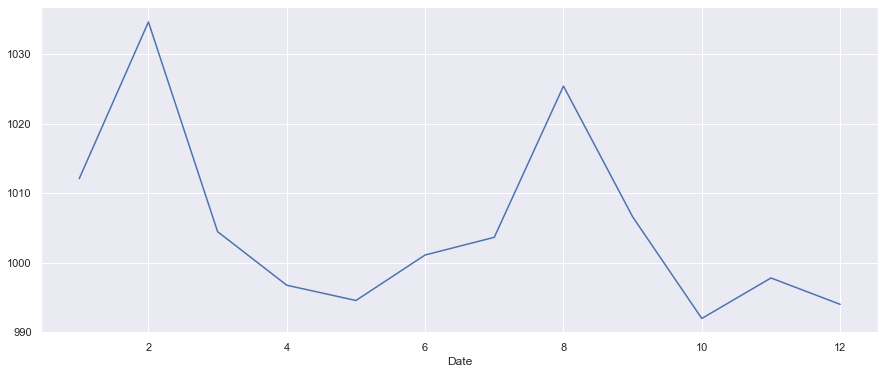

In [42]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

<AxesSubplot:xlabel='Date'>

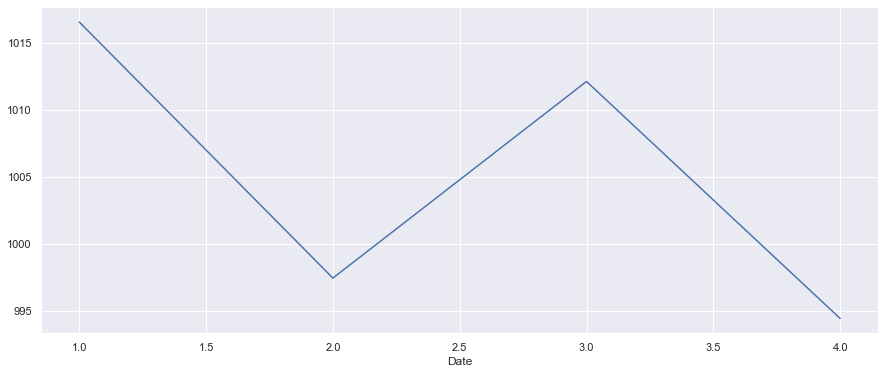

In [43]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: GC=F, dtype: object

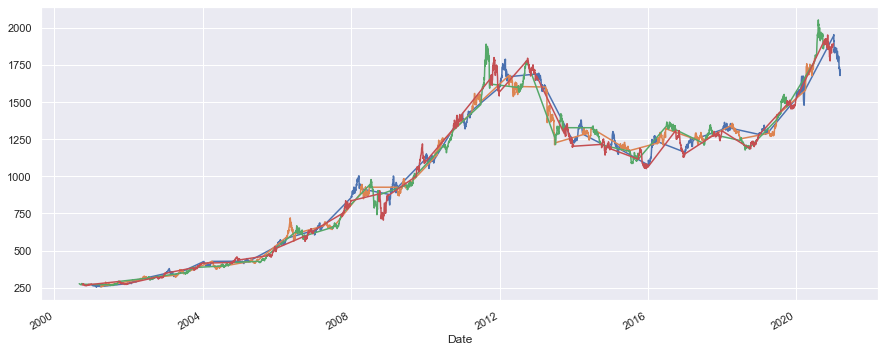

In [44]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

<AxesSubplot:xlabel='Date'>

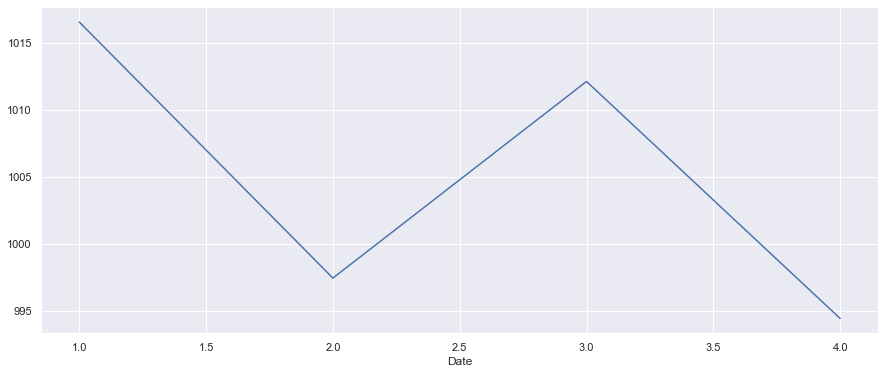

In [45]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

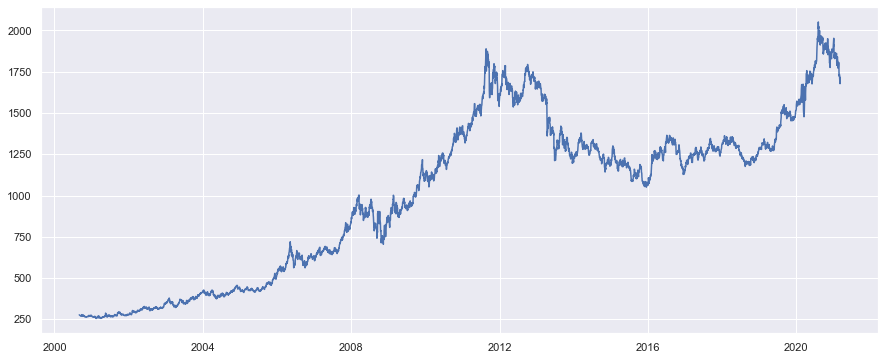

In [46]:
ts = data
plt.plot(ts)

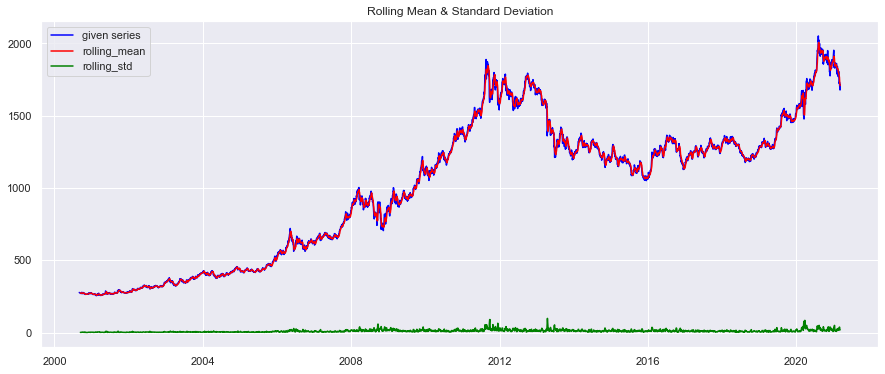

Result of Dickey-Fuller Test:
Test Statistic                  -0.898641
p-value                          0.788420
#lags Used                      11.000000
Number of observation used    5101.000000
Critical value (1%)             -3.431633
Critical value (5%)             -2.862107
Critical value (10%)            -2.567072
dtype: float64


In [47]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7, center = False).mean()
    r_std = input_data.rolling(window = 7, center = False).std()
    
    #plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color = 'green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #perform Dickey-Fuller test
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags Used','Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
   
test_for_stationary(ts)

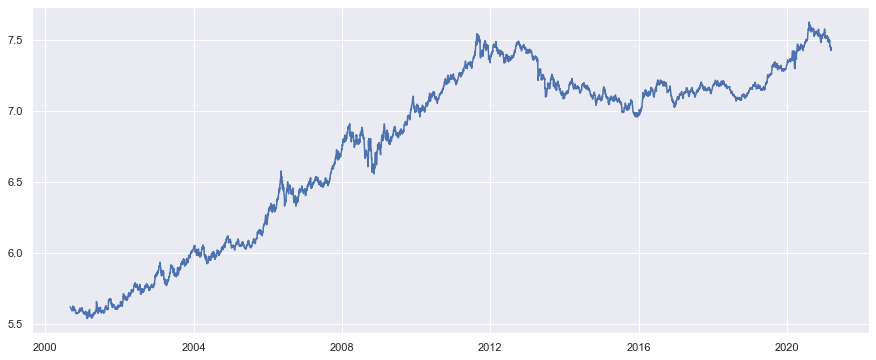

In [48]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [49]:
ts_logtransformed.head(10)

Date
2000-09-01    5.624018
2000-09-05    5.619676
2000-09-06    5.613858
2000-09-07    5.613128
2000-09-08    5.610570
2000-09-11    5.609838
2000-09-12    5.609105
2000-09-13    5.608739
2000-09-14    5.607272
2000-09-15    5.606904
Name: GC=F, dtype: float64

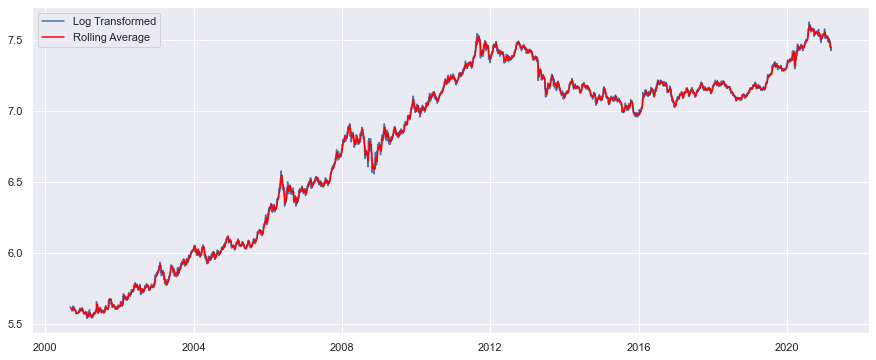

In [50]:
Rolling_average = ts_logtransformed.rolling(window = 7, center = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [51]:
Rolling_average.head(10)

Date
2000-09-01         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08         NaN
2000-09-11         NaN
2000-09-12    5.614313
2000-09-13    5.612131
2000-09-14    5.610359
2000-09-15    5.609365
Name: GC=F, dtype: float64

In [52]:
log_rolling_difference = ts_logtransformed - Rolling_average
log_rolling_difference.head(10)
log_rolling_difference.tail(10)

Date
2021-02-24    0.004000
2021-02-25   -0.006499
2021-02-26   -0.029427
2021-03-01   -0.028513
2021-03-02   -0.018901
2021-03-03   -0.021808
2021-03-04   -0.022153
2021-03-05   -0.015400
2021-03-08   -0.019422
2021-03-09    0.004454
Name: GC=F, dtype: float64

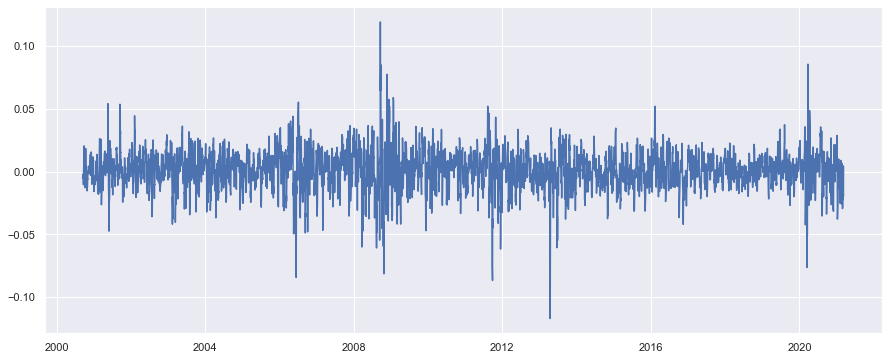

In [53]:
log_rolling_difference.dropna(inplace = True)
plt.plot(log_rolling_difference)

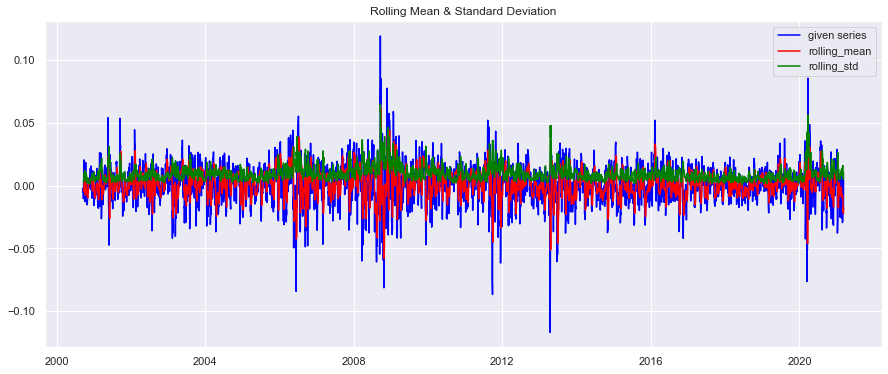

Result of Dickey-Fuller Test:
Test Statistic               -1.587669e+01
p-value                       8.853887e-29
#lags Used                    2.000000e+01
Number of observation used    5.086000e+03
Critical value (1%)          -3.431636e+00
Critical value (5%)          -2.862108e+00
Critical value (10%)         -2.567073e+00
dtype: float64


In [54]:
test_for_stationary(log_rolling_difference)

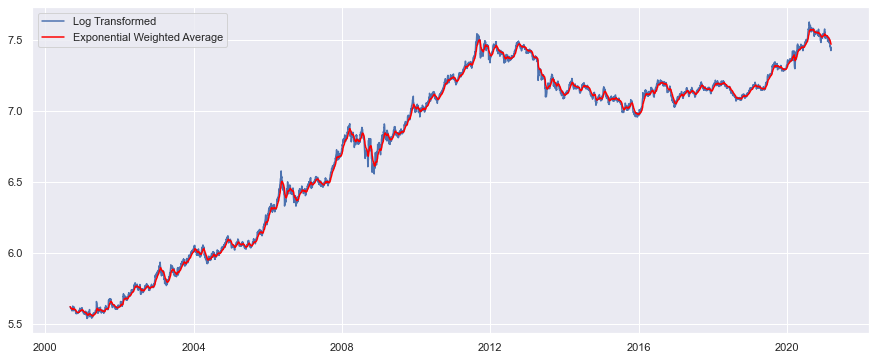

In [55]:
expweighted_avg = ts_logtransformed.ewm(halflife = 7, min_periods = 0, adjust = True, ignore_na = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(expweighted_avg, color = 'red', label = 'Exponential Weighted Average')
plt.legend(loc = 'best')

In [56]:
expweighted_avg.head(10)

Date
2000-09-01    5.624018
2000-09-05    5.621739
2000-09-06    5.618848
2000-09-07    5.617199
2000-09-08    5.615599
2000-09-11    5.614386
2000-09-12    5.613391
2000-09-13    5.612589
2000-09-14    5.611739
2000-09-15    5.611014
Name: GC=F, dtype: float64

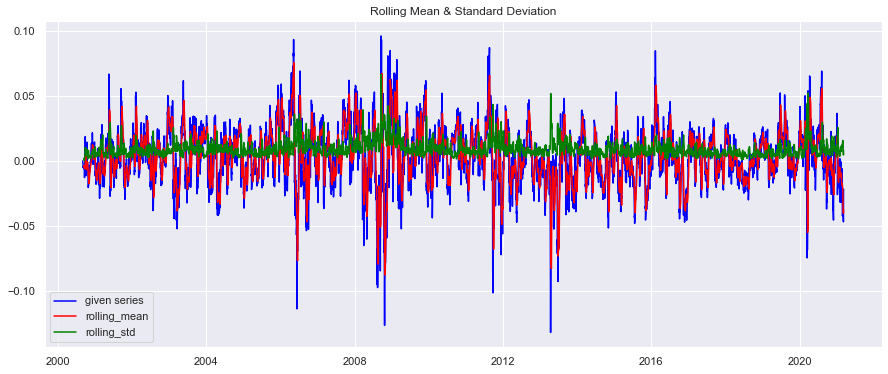

Result of Dickey-Fuller Test:
Test Statistic               -1.357137e+01
p-value                       2.211627e-25
#lags Used                    1.100000e+01
Number of observation used    5.101000e+03
Critical value (1%)          -3.431633e+00
Critical value (5%)          -2.862107e+00
Critical value (10%)         -2.567072e+00
dtype: float64


In [57]:
log_expmovwt_diff = ts_logtransformed - expweighted_avg
test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='Date'>

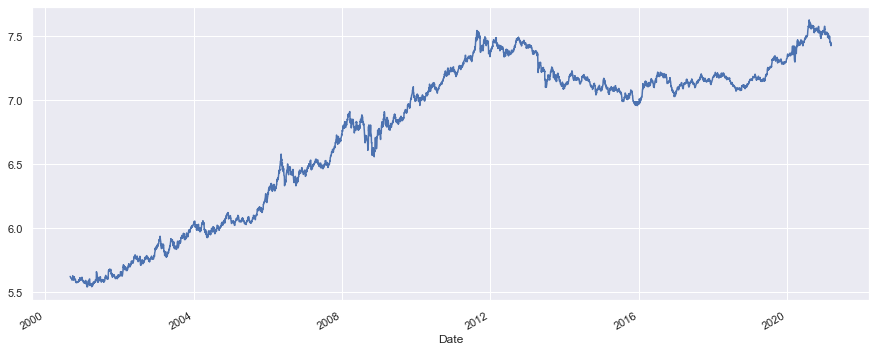

In [58]:
ts_logtransformed.plot()

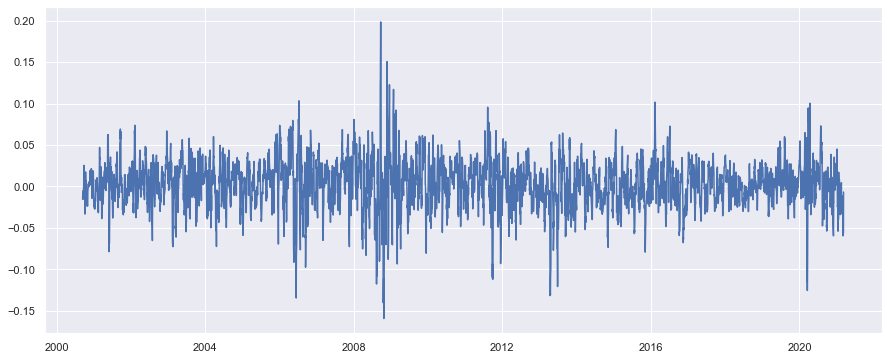

In [59]:
ts_diff_logtrans = ts_logtransformed - ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)

In [60]:
ts_diff_logtrans.head(10)

Date
2000-09-01         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08         NaN
2000-09-11         NaN
2000-09-12         NaN
2000-09-13   -0.015279
2000-09-14   -0.012404
2000-09-15   -0.006953
Name: GC=F, dtype: float64

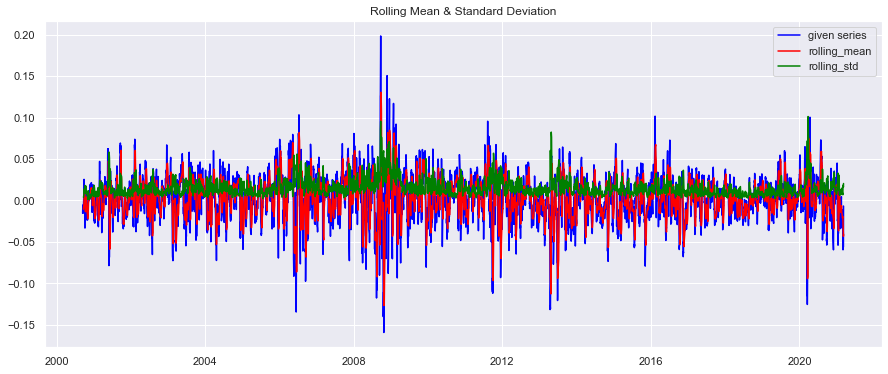

Result of Dickey-Fuller Test:
Test Statistic               -1.313922e+01
p-value                       1.440896e-24
#lags Used                    3.300000e+01
Number of observation used    5.072000e+03
Critical value (1%)          -3.431640e+00
Critical value (5%)          -2.862110e+00
Critical value (10%)         -2.567073e+00
dtype: float64


In [61]:
ts_diff_logtrans.dropna(inplace = True)
test_for_stationary(ts_diff_logtrans)

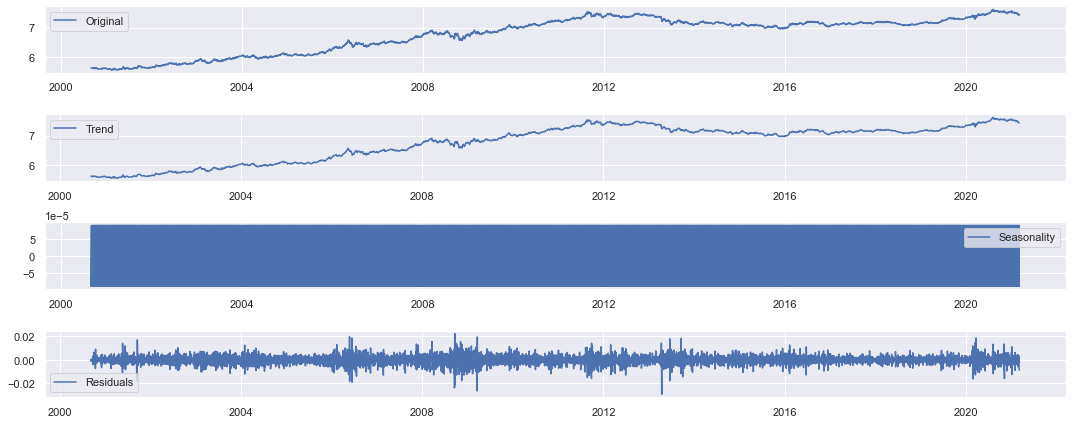

In [62]:
decomposition = seasonal_decompose(ts_logtransformed, period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

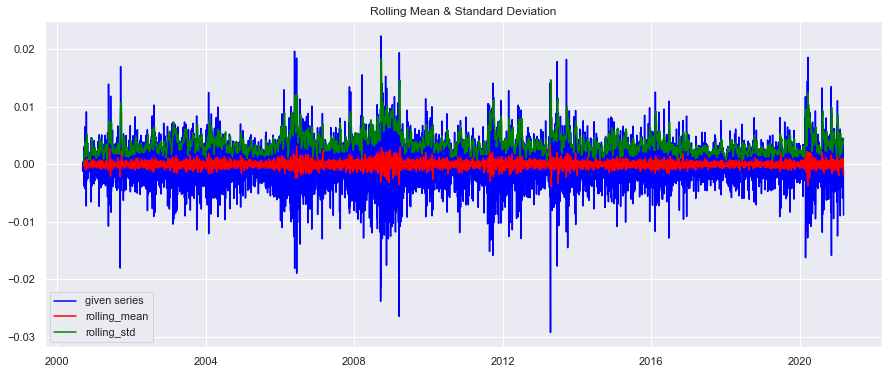

Result of Dickey-Fuller Test:
Test Statistic                 -21.001440
p-value                          0.000000
#lags Used                      33.000000
Number of observation used    5077.000000
Critical value (1%)             -3.431639
Critical value (5%)             -2.862109
Critical value (10%)            -2.567073
dtype: float64


In [63]:
decomposed_TS = residual
decomposed_TS.dropna(inplace = True)
test_for_stationary(decomposed_TS)

In [64]:
lag_acf = acf(ts_diff_logtrans, nlags = 30)
lag_pacf = pacf(ts_diff_logtrans, nlags = 50, method = 'ols')

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'AutoCorrelation Function')

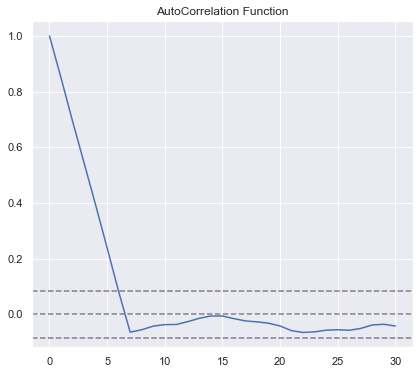

In [65]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('AutoCorrelation Function')

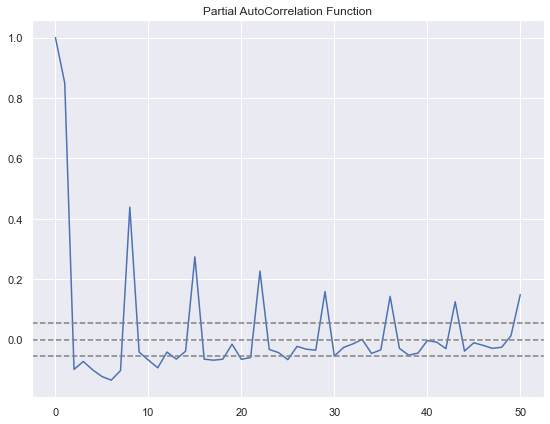

In [66]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

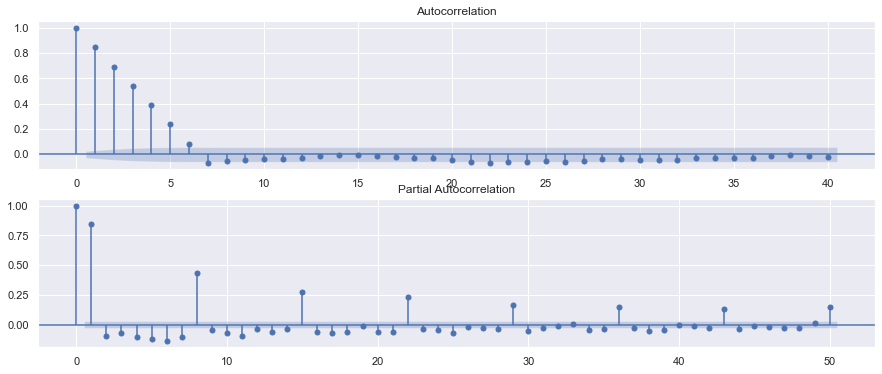

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(), lags =40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags =50)
pyplot.show()

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

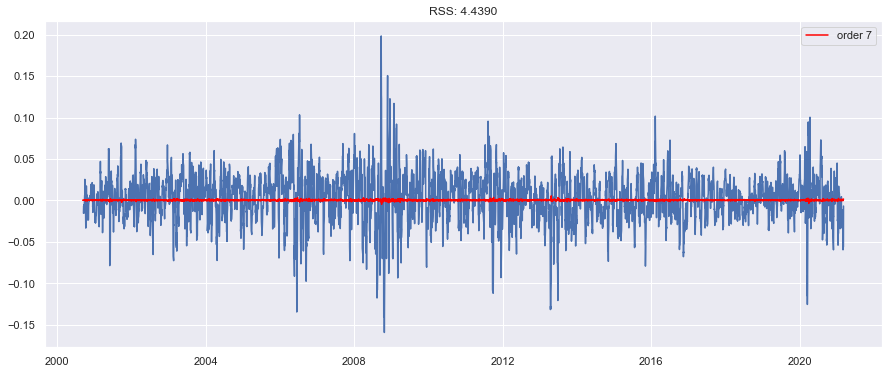

In [70]:
model = ARIMA(ts_logtransformed, order = (8,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 7')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [71]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5112
Model:                 ARIMA(8, 1, 0)   Log Likelihood               15720.853
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 13 Mar 2021   AIC                         -31421.706
Time:                        17:34:34   BIC                         -31356.312
Sample:                             1   HQIC                        -31398.812
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.478      0.013    7.47e-05       0.001
ar.L1.D.GC=F    -0.0093      0.014     -0.662      0.508      -0.037       0.018
ar.L2.D.GC=F    -0.0033      0.014     -0.23

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

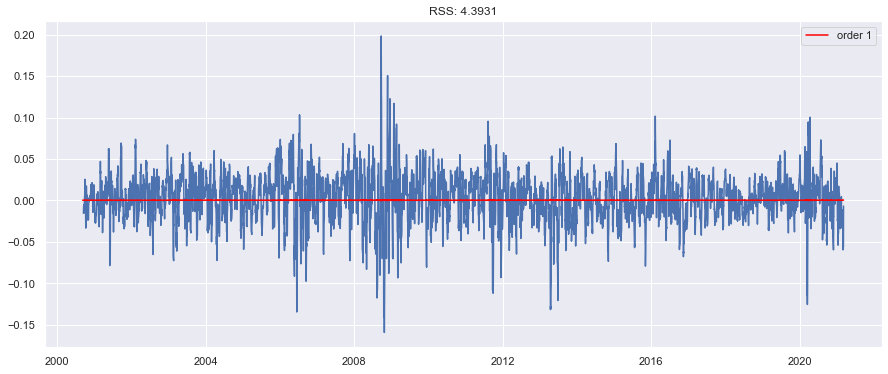

In [72]:
model = ARIMA(ts_logtransformed, order = (2,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 1')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [73]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5112
Model:                 ARIMA(2, 1, 0)   Log Likelihood               15714.141
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 13 Mar 2021   AIC                         -31420.283
Time:                        17:34:36   BIC                         -31394.125
Sample:                             1   HQIC                        -31411.125
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.306      0.021    5.35e-05       0.001
ar.L1.D.GC=F    -0.0084      0.014     -0.601      0.548      -0.036       0.019
ar.L2.D.GC=F    -0.0028      0.014     -0.20

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

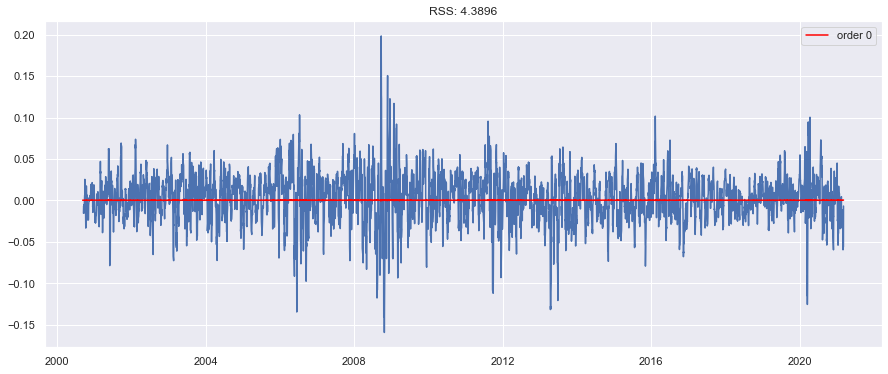

In [74]:
model = ARIMA(ts_logtransformed, order = (1,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 0')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [75]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5112
Model:                 ARIMA(1, 1, 0)   Log Likelihood               15714.121
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 13 Mar 2021   AIC                         -31422.243
Time:                        17:34:36   BIC                         -31402.625
Sample:                             1   HQIC                        -31415.375
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.299      0.021    5.26e-05       0.001
ar.L1.D.GC=F    -0.0084      0.014     -0.599      0.549      -0.036       0.019
                                    Roots   

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

Text(0.5, 1.0, 'RSS: 4.3896')

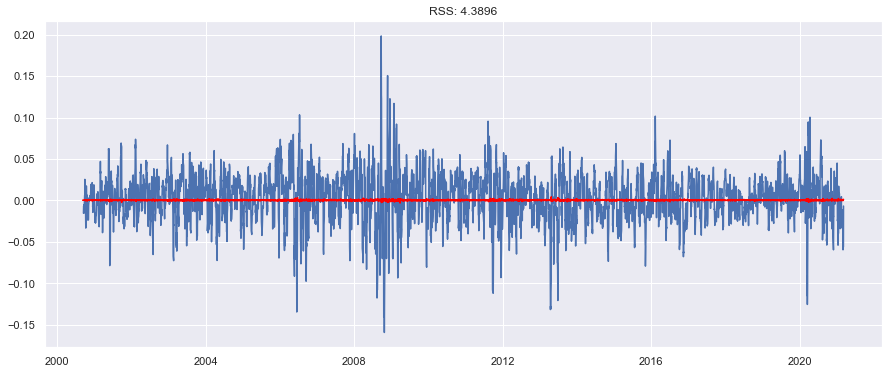

In [76]:
model = ARIMA(ts_logtransformed, order = (0,1,6))
result_MA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'order 6')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
#plt.legend(loc = 'best')

In [77]:
print(result_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5112
Model:                 ARIMA(0, 1, 6)   Log Likelihood               15718.973
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 13 Mar 2021   AIC                         -31421.947
Time:                        17:34:38   BIC                         -31369.632
Sample:                             1   HQIC                        -31403.632
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.410      0.016    6.67e-05       0.001
ma.L1.D.GC=F    -0.0103      0.014     -0.735      0.462      -0.038       0.017
ma.L2.D.GC=F    -0.0033      0.014     -0.23

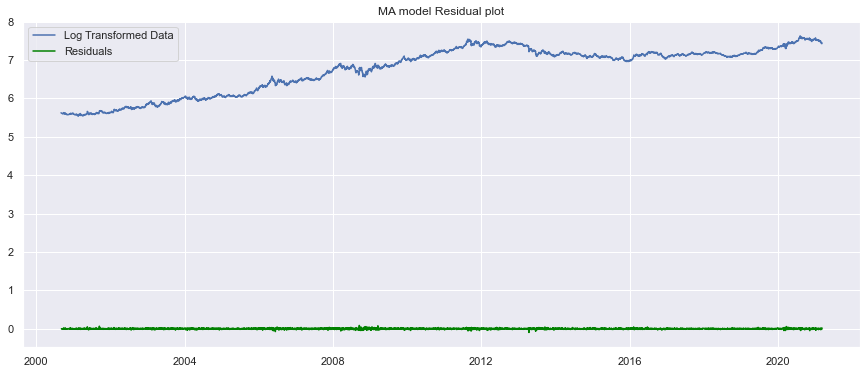

In [78]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_MA.resid, color = 'green', label = 'Residuals')
plt.title('MA model Residual plot')
plt.legend(loc = 'best')

count    5.112000e+03
mean    -1.608929e-07
std      1.117855e-02
min     -9.815785e-02
25%     -5.209385e-03
50%      1.576003e-04
75%      5.893325e-03
max      8.535581e-02
dtype: float64


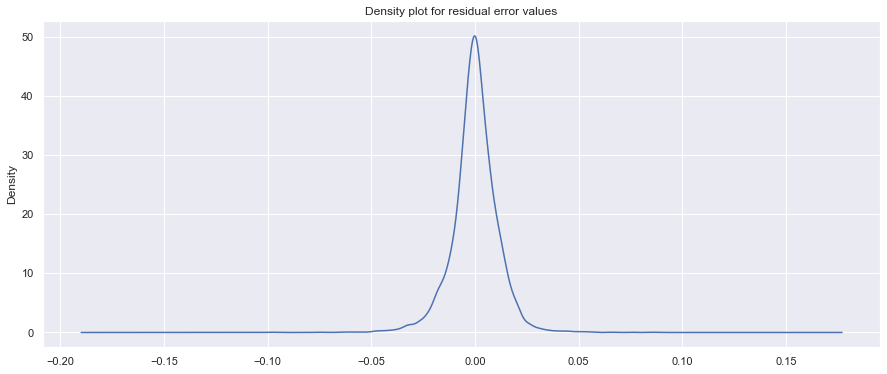

In [79]:
result_MA.resid.plot(kind = 'kde')
plt.title('Density plot for residual error values')
print(result_MA.resid.describe())

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

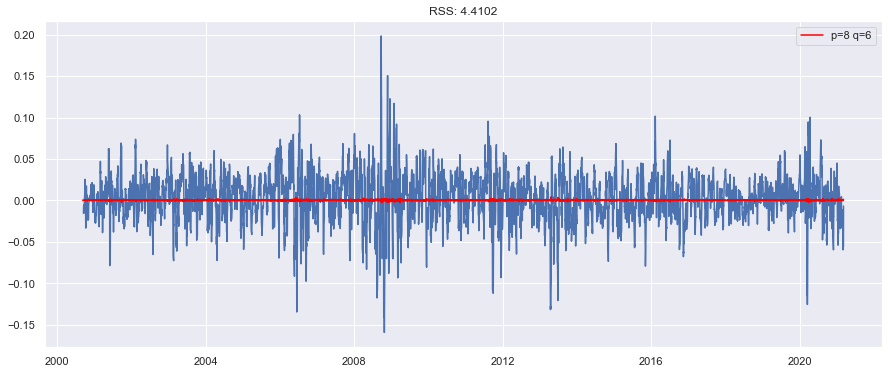

In [80]:
model = ARIMA(ts_logtransformed, order = (8,1,6))
result_ARIMA = model.fit(trend = 'nc',disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'p=8 q=6')
RSS = result_ARIMA.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [81]:
print(result_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5112
Model:                 ARIMA(8, 1, 6)   Log Likelihood               15731.600
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 13 Mar 2021   AIC                         -31433.200
Time:                        17:35:44   BIC                         -31335.110
Sample:                             1   HQIC                        -31398.859
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.GC=F    -0.4462      0.514     -0.868      0.385      -1.454       0.561
ar.L2.D.GC=F    -0.2513      0.100     -2.516      0.012      -0.447      -0.056
ar.L3.D.GC=F     0.0403      0.117      0.34

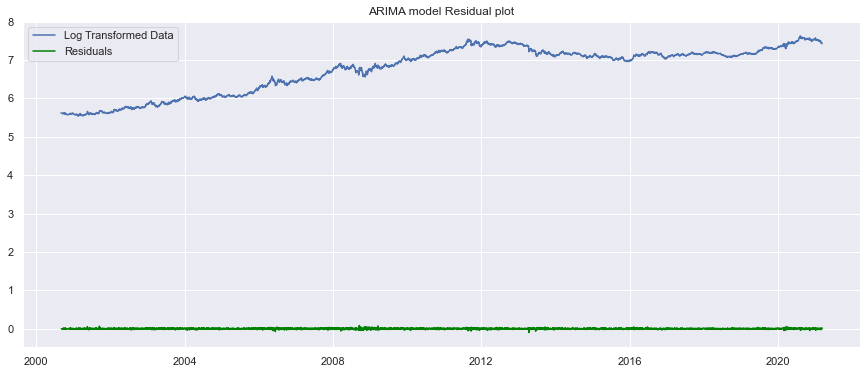

In [82]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_ARIMA.resid, color = 'green', label = 'Residuals')
plt.title('ARIMA model Residual plot')
plt.legend(loc = 'best')

count    5112.000000
mean        0.000419
std         0.011143
min        -0.098925
25%        -0.004786
50%         0.000497
75%         0.006305
max         0.083705
dtype: float64


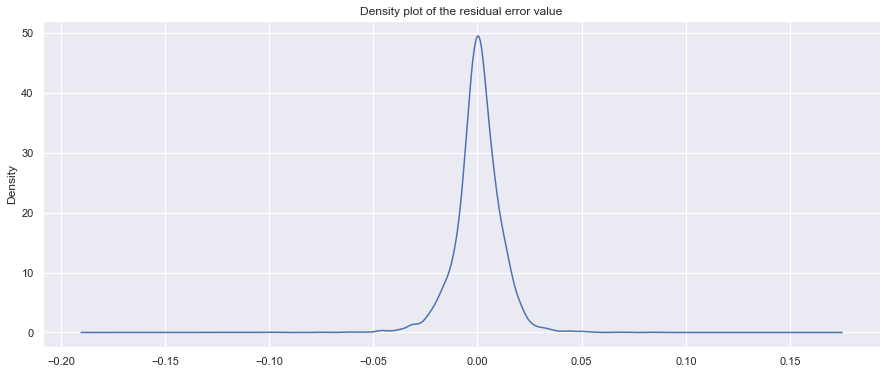

In [83]:
result_ARIMA.resid.plot(kind = 'kde')
plt.title('Density plot of the residual error value')
print(result_ARIMA.resid.describe())

In [84]:
test = data

In [85]:
print(test[0])

277.0


In [86]:
print(data[0])

277.0


In [87]:
test_data = test.dropna()

In [88]:
test_data.shape

(5113,)

In [89]:
test_data

Date
2000-09-01     277.000000
2000-09-05     275.799988
2000-09-06     274.200012
2000-09-07     274.000000
2000-09-08     273.299988
                 ...     
2021-03-03    1715.300049
2021-03-04    1700.199951
2021-03-05    1698.000000
2021-03-08    1677.699951
2021-03-09    1716.599976
Name: GC=F, Length: 5113, dtype: float64

In [90]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

Date
2000-09-05    0.000000
2000-09-06    0.000032
2000-09-07    0.000051
2000-09-08   -0.000007
2000-09-11    0.000022
dtype: float64


In [91]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2000-09-05    0.000000
2000-09-06    0.000032
2000-09-07    0.000083
2000-09-08    0.000076
2000-09-11    0.000097
dtype: float64


In [92]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Date
2000-09-01    5.624018
2000-09-05    5.624018
2000-09-06    5.624049
2000-09-07    5.624100
2000-09-08    5.624093
dtype: float64

Text(0.5, 1.0, 'RMSE: 925.8461')

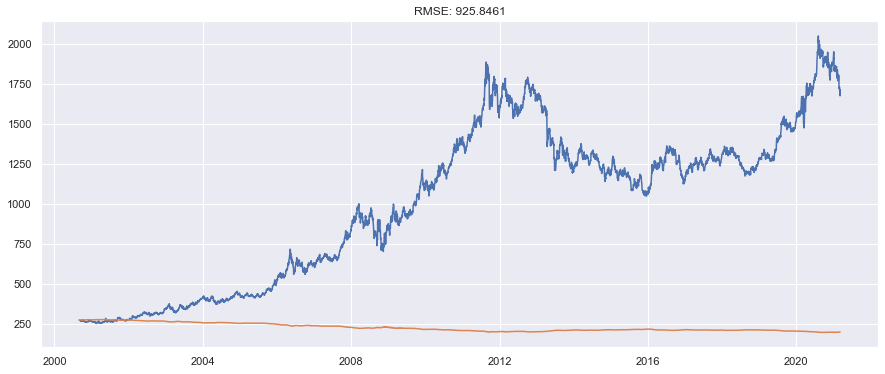

In [93]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title("RMSE: %.4f"%np.sqrt(sum((predictions_ARIMA - data)**2)/len(data)))

In [94]:
for i in var.index:
    number = var.Steps[i]

In [95]:
number

297

In [96]:
dates = [
            pd.Timestamp('2021-01-01'),
            pd.Timestamp('2021-01-02'),
            pd.Timestamp('2021-01-03'), 
            pd.Timestamp('2021-01-04'),
            pd.Timestamp('2021-01-05'),
            pd.Timestamp('2021-01-06'),
            pd.Timestamp('2021-01-07'),
            pd.Timestamp('2021-01-08'),
            pd.Timestamp('2021-01-09'),
            pd.Timestamp('2021-01-10'),
            pd.Timestamp('2021-01-11'),
            pd.Timestamp('2021-01-12'),
            pd.Timestamp('2021-01-13'),
            pd.Timestamp('2021-01-14'),
            pd.Timestamp('2021-01-15'),
            pd.Timestamp('2021-01-16'),
            pd.Timestamp('2021-01-17'),
            pd.Timestamp('2021-01-18'),
            pd.Timestamp('2021-01-19'),
            pd.Timestamp('2021-01-20'),
            pd.Timestamp('2021-01-21'),
            pd.Timestamp('2021-01-22'),
            pd.Timestamp('2021-01-23'),
            pd.Timestamp('2021-01-24'),
            pd.Timestamp('2021-01-25'),
            pd.Timestamp('2021-01-26'),
            pd.Timestamp('2021-01-27'),
            pd.Timestamp('2021-01-28'),
            pd.Timestamp('2021-01-29'),
            pd.Timestamp('2021-01-30'),
            pd.Timestamp('2021-01-31'),
            pd.Timestamp('2021-02-01'),
            pd.Timestamp('2021-02-02'),
            pd.Timestamp('2021-02-03'),
            pd.Timestamp('2021-02-04'),
            pd.Timestamp('2021-02-05'),
            pd.Timestamp('2021-02-06'),
            pd.Timestamp('2021-02-07'),
            pd.Timestamp('2021-02-08'),
            pd.Timestamp('2021-02-09'),
            pd.Timestamp('2021-02-10'),
            pd.Timestamp('2021-02-11'),
            pd.Timestamp('2021-02-12'),
            pd.Timestamp('2021-02-13'),
            pd.Timestamp('2021-02-14'),
            pd.Timestamp('2021-02-15'),
            pd.Timestamp('2021-02-16'),
            pd.Timestamp('2021-02-17'),
            pd.Timestamp('2021-02-18'),
            pd.Timestamp('2021-02-19'),
            pd.Timestamp('2021-02-20'),
            pd.Timestamp('2021-02-21'),
            pd.Timestamp('2021-02-22'),
            pd.Timestamp('2021-02-23'),
            pd.Timestamp('2021-02-24'),
            pd.Timestamp('2021-02-25'),
            pd.Timestamp('2021-02-26'),
            pd.Timestamp('2021-02-27'),
            pd.Timestamp('2021-02-28'),
            pd.Timestamp('2021-03-01'),
            pd.Timestamp('2021-03-02'),
            pd.Timestamp('2021-03-03'),
            pd.Timestamp('2021-03-04'),
            pd.Timestamp('2021-03-05'),
            pd.Timestamp('2021-03-06'),
            pd.Timestamp('2021-03-07'),
            pd.Timestamp('2021-03-08'),
            pd.Timestamp('2021-03-09'),
            pd.Timestamp('2021-03-10'),
            pd.Timestamp('2021-03-11'),
            pd.Timestamp('2021-03-12'),
            pd.Timestamp('2021-03-13'),
            pd.Timestamp('2021-03-14'),
            pd.Timestamp('2021-03-15'),
            pd.Timestamp('2021-03-16'),
            pd.Timestamp('2021-03-17'),
            pd.Timestamp('2021-03-18'),
            pd.Timestamp('2021-03-19'),
            pd.Timestamp('2021-03-20'),
            pd.Timestamp('2021-03-21'),
            pd.Timestamp('2021-03-22'),
            pd.Timestamp('2021-03-23'),
            pd.Timestamp('2021-03-24'),
            pd.Timestamp('2021-03-25'),
            pd.Timestamp('2021-03-26'),
            pd.Timestamp('2021-03-27'),
            pd.Timestamp('2021-03-28'),
            pd.Timestamp('2021-03-29'),
            pd.Timestamp('2021-03-30'),
            pd.Timestamp('2021-03-31'),
            pd.Timestamp('2021-04-01'),
            pd.Timestamp('2021-04-02'),
            pd.Timestamp('2021-04-03'),
            pd.Timestamp('2021-04-04'),
            pd.Timestamp('2021-04-05'),
            pd.Timestamp('2021-04-06'),
            pd.Timestamp('2021-04-07'),
            pd.Timestamp('2021-04-08'),
            pd.Timestamp('2021-04-09'),
            pd.Timestamp('2021-04-10'),
            pd.Timestamp('2021-04-11'),
            pd.Timestamp('2021-04-12'),
            pd.Timestamp('2021-04-13'),
            pd.Timestamp('2021-04-14'),
            pd.Timestamp('2021-04-15'),
            pd.Timestamp('2021-04-16'),
            pd.Timestamp('2021-04-17'),
            pd.Timestamp('2021-04-18'),
            pd.Timestamp('2021-04-19'),
            pd.Timestamp('2021-04-20'),
            pd.Timestamp('2021-04-21'),
            pd.Timestamp('2021-04-22'),
            pd.Timestamp('2021-04-23'),
            pd.Timestamp('2021-04-24'),
            pd.Timestamp('2021-04-25'),
            pd.Timestamp('2021-04-26'),
            pd.Timestamp('2021-04-27'),
            pd.Timestamp('2021-04-28'),
            pd.Timestamp('2021-04-29'),
            pd.Timestamp('2021-04-30'),
            pd.Timestamp('2021-05-01'),
            pd.Timestamp('2021-05-02'),
            pd.Timestamp('2021-05-03'),
            pd.Timestamp('2021-05-04'),
            pd.Timestamp('2021-05-05'),
            pd.Timestamp('2021-05-06'),
            pd.Timestamp('2021-05-07'),
            pd.Timestamp('2021-05-08'),
            pd.Timestamp('2021-05-09'),
            pd.Timestamp('2021-05-10'),
            pd.Timestamp('2021-05-11'),
            pd.Timestamp('2021-05-12'),
            pd.Timestamp('2021-05-13'),
            pd.Timestamp('2021-05-14'),
            pd.Timestamp('2021-05-15'),
            pd.Timestamp('2021-05-16'),
            pd.Timestamp('2021-05-17'),
            pd.Timestamp('2021-05-18'),
            pd.Timestamp('2021-05-19'),
            pd.Timestamp('2021-05-20'),
            pd.Timestamp('2021-05-21'),
            pd.Timestamp('2021-05-22'),
            pd.Timestamp('2021-05-23'),
            pd.Timestamp('2021-05-24'),
            pd.Timestamp('2021-05-25'),
            pd.Timestamp('2021-05-26'),
            pd.Timestamp('2021-05-27'),
            pd.Timestamp('2021-05-28'),
            pd.Timestamp('2021-05-29'),
            pd.Timestamp('2021-05-30'),
            pd.Timestamp('2021-05-31'),
            pd.Timestamp('2021-06-01'),
            pd.Timestamp('2021-06-02'),
            pd.Timestamp('2021-06-03'),
            pd.Timestamp('2021-06-04'),
            pd.Timestamp('2021-06-05'),
            pd.Timestamp('2021-06-06'),
            pd.Timestamp('2021-06-07'),
            pd.Timestamp('2021-06-08'),
            pd.Timestamp('2021-06-09'),
            pd.Timestamp('2021-06-10'),
            pd.Timestamp('2021-06-11'),
            pd.Timestamp('2021-06-12'),
            pd.Timestamp('2021-06-13'),
            pd.Timestamp('2021-06-14'),
            pd.Timestamp('2021-06-15'),
            pd.Timestamp('2021-06-16'),
            pd.Timestamp('2021-06-17'),
            pd.Timestamp('2021-06-18'),
            pd.Timestamp('2021-06-19'),
            pd.Timestamp('2021-06-20'),
            pd.Timestamp('2021-06-21'),
            pd.Timestamp('2021-06-22'),
            pd.Timestamp('2021-06-23'),
            pd.Timestamp('2021-06-24'),
            pd.Timestamp('2021-06-25'),
            pd.Timestamp('2021-06-26'),
            pd.Timestamp('2021-06-27'),
            pd.Timestamp('2021-06-28'),
            pd.Timestamp('2021-06-29'),
            pd.Timestamp('2021-06-30'),
            pd.Timestamp('2021-07-01'),
            pd.Timestamp('2021-07-02'),
            pd.Timestamp('2021-07-03'),
            pd.Timestamp('2021-07-04'),
            pd.Timestamp('2021-07-05'),
            pd.Timestamp('2021-07-06'),
            pd.Timestamp('2021-07-07'),
            pd.Timestamp('2021-07-08'),
            pd.Timestamp('2021-07-09'),
            pd.Timestamp('2021-07-10'),
            pd.Timestamp('2021-07-11'),
            pd.Timestamp('2021-07-12'),
            pd.Timestamp('2021-07-13'),
            pd.Timestamp('2021-07-14'),
            pd.Timestamp('2021-07-15'),
            pd.Timestamp('2021-07-16'),
            pd.Timestamp('2021-07-17'),
            pd.Timestamp('2021-07-18'),
            pd.Timestamp('2021-07-19'),
            pd.Timestamp('2021-07-20'),
            pd.Timestamp('2021-07-21'),
            pd.Timestamp('2021-07-22'),
            pd.Timestamp('2021-07-23'),
            pd.Timestamp('2021-07-24'),
            pd.Timestamp('2021-07-25'),
            pd.Timestamp('2021-07-26'),
            pd.Timestamp('2021-07-27'),
            pd.Timestamp('2021-07-28'),
            pd.Timestamp('2021-07-29'),
            pd.Timestamp('2021-07-30'),
            pd.Timestamp('2021-07-31'),
            pd.Timestamp('2021-08-01'),
            pd.Timestamp('2021-08-02'),
            pd.Timestamp('2021-08-03'),
            pd.Timestamp('2021-08-04'),
            pd.Timestamp('2021-08-05'),
            pd.Timestamp('2021-08-06'),
            pd.Timestamp('2021-08-07'),
            pd.Timestamp('2021-08-08'),
            pd.Timestamp('2021-08-09'),
            pd.Timestamp('2021-08-10'),
            pd.Timestamp('2021-08-11'),
            pd.Timestamp('2021-08-12'),
            pd.Timestamp('2021-08-13'),
            pd.Timestamp('2021-08-14'),
            pd.Timestamp('2021-08-15'),
            pd.Timestamp('2021-08-16'),
            pd.Timestamp('2021-08-17'),
            pd.Timestamp('2021-08-18'),
            pd.Timestamp('2021-08-19'),
            pd.Timestamp('2021-08-20'),
            pd.Timestamp('2021-08-21'),
            pd.Timestamp('2021-08-22'),
            pd.Timestamp('2021-08-23'),
            pd.Timestamp('2021-08-24'),
            pd.Timestamp('2021-08-25'),
            pd.Timestamp('2021-08-26'),
            pd.Timestamp('2021-08-27'),
            pd.Timestamp('2021-08-28'),
            pd.Timestamp('2021-08-29'),
            pd.Timestamp('2021-08-30'),
            pd.Timestamp('2021-08-31'),
            pd.Timestamp('2021-09-01'), 
            pd.Timestamp('2021-09-02'),
            pd.Timestamp('2021-09-03'),
            pd.Timestamp('2021-09-04'),
            pd.Timestamp('2021-09-05'),
            pd.Timestamp('2021-09-06'),
            pd.Timestamp('2021-09-07'), 
            pd.Timestamp('2021-09-08'),
            pd.Timestamp('2021-09-09'),
            pd.Timestamp('2021-09-10'),
            pd.Timestamp('2021-09-11'),
            pd.Timestamp('2021-09-12'), 
            pd.Timestamp('2021-09-13'),
            pd.Timestamp('2021-09-14'),
            pd.Timestamp('2021-09-15'),
            pd.Timestamp('2021-09-16'),
            pd.Timestamp('2021-09-17'), 
            pd.Timestamp('2021-09-18'),
            pd.Timestamp('2021-09-19'),
            pd.Timestamp('2021-09-20'),
            pd.Timestamp('2021-09-21'),
            pd.Timestamp('2021-09-22'), 
            pd.Timestamp('2021-09-23'),
            pd.Timestamp('2021-09-24'),
            pd.Timestamp('2021-09-25'),
            pd.Timestamp('2021-09-26'),
            pd.Timestamp('2021-09-27'), 
            pd.Timestamp('2021-09-28'),
            pd.Timestamp('2021-09-29'),
            pd.Timestamp('2021-09-30'),
            pd.Timestamp('2021-10-01'),
            pd.Timestamp('2021-10-02'),
            pd.Timestamp('2021-10-03'),
            pd.Timestamp('2021-10-04'),
            pd.Timestamp('2021-10-05'),
            pd.Timestamp('2021-10-06'),
            pd.Timestamp('2021-10-07'),
            pd.Timestamp('2021-10-08'),
            pd.Timestamp('2021-10-09'),
            pd.Timestamp('2021-10-10'),
            pd.Timestamp('2021-10-11'),
            pd.Timestamp('2021-10-12'),
            pd.Timestamp('2021-10-13'),
            pd.Timestamp('2021-10-14'),
            pd.Timestamp('2021-10-15'),
            pd.Timestamp('2021-10-16'),
            pd.Timestamp('2021-10-17'),
            pd.Timestamp('2021-10-18'),
            pd.Timestamp('2021-10-19'),
            pd.Timestamp('2021-10-20'),
            pd.Timestamp('2021-10-21'),
            pd.Timestamp('2021-10-22'),
            pd.Timestamp('2021-10-23'),
            pd.Timestamp('2021-10-24'),
            pd.Timestamp('2021-10-25'),
            pd.Timestamp('2021-10-26'),
            pd.Timestamp('2021-10-27'),
            pd.Timestamp('2021-10-28'),
            pd.Timestamp('2021-10-29'),
            pd.Timestamp('2021-10-30'),
            pd.Timestamp('2021-10-31'),
            pd.Timestamp('2021-11-01'),
            pd.Timestamp('2021-11-02'),
            pd.Timestamp('2021-11-03'),
            pd.Timestamp('2021-11-04'),
            pd.Timestamp('2021-11-05'),
            pd.Timestamp('2021-11-06'),
            pd.Timestamp('2021-11-07'),
            pd.Timestamp('2021-11-08'),
            pd.Timestamp('2021-11-09'),
            pd.Timestamp('2021-11-10'),
            pd.Timestamp('2021-11-11'),
            pd.Timestamp('2021-11-12'),
            pd.Timestamp('2021-11-13'),
            pd.Timestamp('2021-11-14'),
            pd.Timestamp('2021-11-15'),
            pd.Timestamp('2021-11-16'),
            pd.Timestamp('2021-11-17'),
            pd.Timestamp('2021-11-18'),
            pd.Timestamp('2021-11-19'),
            pd.Timestamp('2021-11-20'),
            pd.Timestamp('2021-11-21'),
            pd.Timestamp('2021-11-22'),
            pd.Timestamp('2021-11-23'),
            pd.Timestamp('2021-11-24'),
            pd.Timestamp('2021-11-25'),
            pd.Timestamp('2021-11-26'),
            pd.Timestamp('2021-11-27'),
            pd.Timestamp('2021-11-28'),
            pd.Timestamp('2021-11-29'),
            pd.Timestamp('2021-11-30'),
            pd.Timestamp('2021-12-01'),
            pd.Timestamp('2021-12-02'),
            pd.Timestamp('2021-12-03'),
            pd.Timestamp('2021-12-04'),
            pd.Timestamp('2021-12-05'),
            pd.Timestamp('2021-12-06'),
            pd.Timestamp('2021-12-07'),
            pd.Timestamp('2021-12-08'),
            pd.Timestamp('2021-12-09'),
            pd.Timestamp('2021-12-10'),
            pd.Timestamp('2021-12-11'),
            pd.Timestamp('2021-12-12'),
            pd.Timestamp('2021-12-13'),
            pd.Timestamp('2021-12-14'),
            pd.Timestamp('2021-12-15'),
            pd.Timestamp('2021-12-16'),
            pd.Timestamp('2021-12-17'),
            pd.Timestamp('2021-12-18'),
            pd.Timestamp('2021-12-19'),
            pd.Timestamp('2021-12-20'),
            pd.Timestamp('2021-12-21'),
            pd.Timestamp('2021-12-22'),
            pd.Timestamp('2021-12-23'),
            pd.Timestamp('2021-12-24'),
            pd.Timestamp('2021-12-25'),
            pd.Timestamp('2021-12-26'),
            pd.Timestamp('2021-12-27'),
            pd.Timestamp('2021-12-28'),
            pd.Timestamp('2021-12-29'),
            pd.Timestamp('2021-12-30'),
            pd.Timestamp('2021-12-31'),

        ]
Date = dates[s-1:]
forecast = pd.Series(result_ARIMA.forecast(steps= number)[0], Date)
forecast = np.exp(forecast)
print(forecast)


2021-03-10    1716.817661
2021-03-11    1715.429168
2021-03-12    1717.497223
2021-03-13    1721.301931
2021-03-14    1721.660152
                 ...     
2021-12-27    1727.095838
2021-12-28    1726.992624
2021-12-29    1726.925455
2021-12-30    1727.000654
2021-12-31    1726.971360
Length: 297, dtype: float64


In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
prediction_MA_diff = pd.Series(result_MA.fittedvalues, copy = True)
print(prediction_MA_diff.head())

Date
2000-09-05    0.000357
2000-09-06    0.000406
2000-09-07    0.000437
2000-09-08    0.000359
2000-09-11    0.000386
dtype: float64


In [99]:
prediction_MA_diff_cumsum = prediction_MA_diff.cumsum()
print(prediction_MA_diff_cumsum.head())

Date
2000-09-05    0.000357
2000-09-06    0.000763
2000-09-07    0.001200
2000-09-08    0.001559
2000-09-11    0.001945
dtype: float64


In [100]:
prediction_MA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
prediction_MA_log = prediction_MA_log.add(prediction_MA_diff_cumsum, fill_value=0)
prediction_MA_log.head()

Date
2000-09-01    5.624018
2000-09-05    5.624374
2000-09-06    5.624781
2000-09-07    5.625218
2000-09-08    5.625577
dtype: float64

Text(0.5, 1.0, 'RMSE: 374.6329')

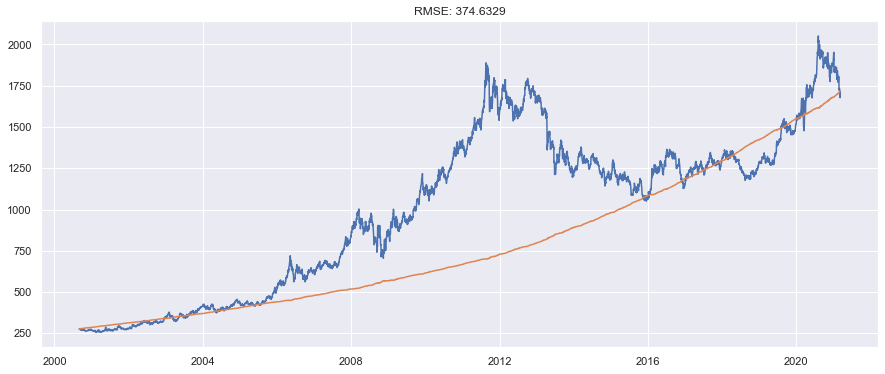

In [101]:
prediction_MA = np.exp(prediction_MA_log)
plt.plot(data)
plt.plot(prediction_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_MA - data)**2)/len(data)))

In [102]:
dates = [
            pd.Timestamp('2021-01-01'),
            pd.Timestamp('2021-01-02'),
            pd.Timestamp('2021-01-03'), 
            pd.Timestamp('2021-01-04'),
            pd.Timestamp('2021-01-05'),
            pd.Timestamp('2021-01-06'),
            pd.Timestamp('2021-01-07'),
            pd.Timestamp('2021-01-08'),
            pd.Timestamp('2021-01-09'),
            pd.Timestamp('2021-01-10'),
            pd.Timestamp('2021-01-11'),
            pd.Timestamp('2021-01-12'),
            pd.Timestamp('2021-01-13'),
            pd.Timestamp('2021-01-14'),
            pd.Timestamp('2021-01-15'),
            pd.Timestamp('2021-01-16'),
            pd.Timestamp('2021-01-17'),
            pd.Timestamp('2021-01-18'),
            pd.Timestamp('2021-01-19'),
            pd.Timestamp('2021-01-20'),
            pd.Timestamp('2021-01-21'),
            pd.Timestamp('2021-01-22'),
            pd.Timestamp('2021-01-23'),
            pd.Timestamp('2021-01-24'),
            pd.Timestamp('2021-01-25'),
            pd.Timestamp('2021-01-26'),
            pd.Timestamp('2021-01-27'),
            pd.Timestamp('2021-01-28'),
            pd.Timestamp('2021-01-29'),
            pd.Timestamp('2021-01-30'),
            pd.Timestamp('2021-01-31'),
            pd.Timestamp('2021-02-01'),
            pd.Timestamp('2021-02-02'),
            pd.Timestamp('2021-02-03'),
            pd.Timestamp('2021-02-04'),
            pd.Timestamp('2021-02-05'),
            pd.Timestamp('2021-02-06'),
            pd.Timestamp('2021-02-07'),
            pd.Timestamp('2021-02-08'),
            pd.Timestamp('2021-02-09'),
            pd.Timestamp('2021-02-10'),
            pd.Timestamp('2021-02-11'),
            pd.Timestamp('2021-02-12'),
            pd.Timestamp('2021-02-13'),
            pd.Timestamp('2021-02-14'),
            pd.Timestamp('2021-02-15'),
            pd.Timestamp('2021-02-16'),
            pd.Timestamp('2021-02-17'),
            pd.Timestamp('2021-02-18'),
            pd.Timestamp('2021-02-19'),
            pd.Timestamp('2021-02-20'),
            pd.Timestamp('2021-02-21'),
            pd.Timestamp('2021-02-22'),
            pd.Timestamp('2021-02-23'),
            pd.Timestamp('2021-02-24'),
            pd.Timestamp('2021-02-25'),
            pd.Timestamp('2021-02-26'),
            pd.Timestamp('2021-02-27'),
            pd.Timestamp('2021-02-28'),
            pd.Timestamp('2021-03-01'),
            pd.Timestamp('2021-03-02'),
            pd.Timestamp('2021-03-03'),
            pd.Timestamp('2021-03-04'),
            pd.Timestamp('2021-03-05'),
            pd.Timestamp('2021-03-06'),
            pd.Timestamp('2021-03-07'),
            pd.Timestamp('2021-03-08'),
            pd.Timestamp('2021-03-09'),
            pd.Timestamp('2021-03-10'),
            pd.Timestamp('2021-03-11'),
            pd.Timestamp('2021-03-12'),
            pd.Timestamp('2021-03-13'),
            pd.Timestamp('2021-03-14'),
            pd.Timestamp('2021-03-15'),
            pd.Timestamp('2021-03-16'),
            pd.Timestamp('2021-03-17'),
            pd.Timestamp('2021-03-18'),
            pd.Timestamp('2021-03-19'),
            pd.Timestamp('2021-03-20'),
            pd.Timestamp('2021-03-21'),
            pd.Timestamp('2021-03-22'),
            pd.Timestamp('2021-03-23'),
            pd.Timestamp('2021-03-24'),
            pd.Timestamp('2021-03-25'),
            pd.Timestamp('2021-03-26'),
            pd.Timestamp('2021-03-27'),
            pd.Timestamp('2021-03-28'),
            pd.Timestamp('2021-03-29'),
            pd.Timestamp('2021-03-30'),
            pd.Timestamp('2021-03-31'),
            pd.Timestamp('2021-04-01'),
            pd.Timestamp('2021-04-02'),
            pd.Timestamp('2021-04-03'),
            pd.Timestamp('2021-04-04'),
            pd.Timestamp('2021-04-05'),
            pd.Timestamp('2021-04-06'),
            pd.Timestamp('2021-04-07'),
            pd.Timestamp('2021-04-08'),
            pd.Timestamp('2021-04-09'),
            pd.Timestamp('2021-04-10'),
            pd.Timestamp('2021-04-11'),
            pd.Timestamp('2021-04-12'),
            pd.Timestamp('2021-04-13'),
            pd.Timestamp('2021-04-14'),
            pd.Timestamp('2021-04-15'),
            pd.Timestamp('2021-04-16'),
            pd.Timestamp('2021-04-17'),
            pd.Timestamp('2021-04-18'),
            pd.Timestamp('2021-04-19'),
            pd.Timestamp('2021-04-20'),
            pd.Timestamp('2021-04-21'),
            pd.Timestamp('2021-04-22'),
            pd.Timestamp('2021-04-23'),
            pd.Timestamp('2021-04-24'),
            pd.Timestamp('2021-04-25'),
            pd.Timestamp('2021-04-26'),
            pd.Timestamp('2021-04-27'),
            pd.Timestamp('2021-04-28'),
            pd.Timestamp('2021-04-29'),
            pd.Timestamp('2021-04-30'),
            pd.Timestamp('2021-05-01'),
            pd.Timestamp('2021-05-02'),
            pd.Timestamp('2021-05-03'),
            pd.Timestamp('2021-05-04'),
            pd.Timestamp('2021-05-05'),
            pd.Timestamp('2021-05-06'),
            pd.Timestamp('2021-05-07'),
            pd.Timestamp('2021-05-08'),
            pd.Timestamp('2021-05-09'),
            pd.Timestamp('2021-05-10'),
            pd.Timestamp('2021-05-11'),
            pd.Timestamp('2021-05-12'),
            pd.Timestamp('2021-05-13'),
            pd.Timestamp('2021-05-14'),
            pd.Timestamp('2021-05-15'),
            pd.Timestamp('2021-05-16'),
            pd.Timestamp('2021-05-17'),
            pd.Timestamp('2021-05-18'),
            pd.Timestamp('2021-05-19'),
            pd.Timestamp('2021-05-20'),
            pd.Timestamp('2021-05-21'),
            pd.Timestamp('2021-05-22'),
            pd.Timestamp('2021-05-23'),
            pd.Timestamp('2021-05-24'),
            pd.Timestamp('2021-05-25'),
            pd.Timestamp('2021-05-26'),
            pd.Timestamp('2021-05-27'),
            pd.Timestamp('2021-05-28'),
            pd.Timestamp('2021-05-29'),
            pd.Timestamp('2021-05-30'),
            pd.Timestamp('2021-05-31'),
            pd.Timestamp('2021-06-01'),
            pd.Timestamp('2021-06-02'),
            pd.Timestamp('2021-06-03'),
            pd.Timestamp('2021-06-04'),
            pd.Timestamp('2021-06-05'),
            pd.Timestamp('2021-06-06'),
            pd.Timestamp('2021-06-07'),
            pd.Timestamp('2021-06-08'),
            pd.Timestamp('2021-06-09'),
            pd.Timestamp('2021-06-10'),
            pd.Timestamp('2021-06-11'),
            pd.Timestamp('2021-06-12'),
            pd.Timestamp('2021-06-13'),
            pd.Timestamp('2021-06-14'),
            pd.Timestamp('2021-06-15'),
            pd.Timestamp('2021-06-16'),
            pd.Timestamp('2021-06-17'),
            pd.Timestamp('2021-06-18'),
            pd.Timestamp('2021-06-19'),
            pd.Timestamp('2021-06-20'),
            pd.Timestamp('2021-06-21'),
            pd.Timestamp('2021-06-22'),
            pd.Timestamp('2021-06-23'),
            pd.Timestamp('2021-06-24'),
            pd.Timestamp('2021-06-25'),
            pd.Timestamp('2021-06-26'),
            pd.Timestamp('2021-06-27'),
            pd.Timestamp('2021-06-28'),
            pd.Timestamp('2021-06-29'),
            pd.Timestamp('2021-06-30'),
            pd.Timestamp('2021-07-01'),
            pd.Timestamp('2021-07-02'),
            pd.Timestamp('2021-07-03'),
            pd.Timestamp('2021-07-04'),
            pd.Timestamp('2021-07-05'),
            pd.Timestamp('2021-07-06'),
            pd.Timestamp('2021-07-07'),
            pd.Timestamp('2021-07-08'),
            pd.Timestamp('2021-07-09'),
            pd.Timestamp('2021-07-10'),
            pd.Timestamp('2021-07-11'),
            pd.Timestamp('2021-07-12'),
            pd.Timestamp('2021-07-13'),
            pd.Timestamp('2021-07-14'),
            pd.Timestamp('2021-07-15'),
            pd.Timestamp('2021-07-16'),
            pd.Timestamp('2021-07-17'),
            pd.Timestamp('2021-07-18'),
            pd.Timestamp('2021-07-19'),
            pd.Timestamp('2021-07-20'),
            pd.Timestamp('2021-07-21'),
            pd.Timestamp('2021-07-22'),
            pd.Timestamp('2021-07-23'),
            pd.Timestamp('2021-07-24'),
            pd.Timestamp('2021-07-25'),
            pd.Timestamp('2021-07-26'),
            pd.Timestamp('2021-07-27'),
            pd.Timestamp('2021-07-28'),
            pd.Timestamp('2021-07-29'),
            pd.Timestamp('2021-07-30'),
            pd.Timestamp('2021-07-31'),
            pd.Timestamp('2021-08-01'),
            pd.Timestamp('2021-08-02'),
            pd.Timestamp('2021-08-03'),
            pd.Timestamp('2021-08-04'),
            pd.Timestamp('2021-08-05'),
            pd.Timestamp('2021-08-06'),
            pd.Timestamp('2021-08-07'),
            pd.Timestamp('2021-08-08'),
            pd.Timestamp('2021-08-09'),
            pd.Timestamp('2021-08-10'),
            pd.Timestamp('2021-08-11'),
            pd.Timestamp('2021-08-12'),
            pd.Timestamp('2021-08-13'),
            pd.Timestamp('2021-08-14'),
            pd.Timestamp('2021-08-15'),
            pd.Timestamp('2021-08-16'),
            pd.Timestamp('2021-08-17'),
            pd.Timestamp('2021-08-18'),
            pd.Timestamp('2021-08-19'),
            pd.Timestamp('2021-08-20'),
            pd.Timestamp('2021-08-21'),
            pd.Timestamp('2021-08-22'),
            pd.Timestamp('2021-08-23'),
            pd.Timestamp('2021-08-24'),
            pd.Timestamp('2021-08-25'),
            pd.Timestamp('2021-08-26'),
            pd.Timestamp('2021-08-27'),
            pd.Timestamp('2021-08-28'),
            pd.Timestamp('2021-08-29'),
            pd.Timestamp('2021-08-30'),
            pd.Timestamp('2021-08-31'),
            pd.Timestamp('2021-09-01'), 
            pd.Timestamp('2021-09-02'),
            pd.Timestamp('2021-09-03'),
            pd.Timestamp('2021-09-04'),
            pd.Timestamp('2021-09-05'),
            pd.Timestamp('2021-09-06'),
            pd.Timestamp('2021-09-07'), 
            pd.Timestamp('2021-09-08'),
            pd.Timestamp('2021-09-09'),
            pd.Timestamp('2021-09-10'),
            pd.Timestamp('2021-09-11'),
            pd.Timestamp('2021-09-12'), 
            pd.Timestamp('2021-09-13'),
            pd.Timestamp('2021-09-14'),
            pd.Timestamp('2021-09-15'),
            pd.Timestamp('2021-09-16'),
            pd.Timestamp('2021-09-17'), 
            pd.Timestamp('2021-09-18'),
            pd.Timestamp('2021-09-19'),
            pd.Timestamp('2021-09-20'),
            pd.Timestamp('2021-09-21'),
            pd.Timestamp('2021-09-22'), 
            pd.Timestamp('2021-09-23'),
            pd.Timestamp('2021-09-24'),
            pd.Timestamp('2021-09-25'),
            pd.Timestamp('2021-09-26'),
            pd.Timestamp('2021-09-27'), 
            pd.Timestamp('2021-09-28'),
            pd.Timestamp('2021-09-29'),
            pd.Timestamp('2021-09-30'),
            pd.Timestamp('2021-10-01'),
            pd.Timestamp('2021-10-02'),
            pd.Timestamp('2021-10-03'),
            pd.Timestamp('2021-10-04'),
            pd.Timestamp('2021-10-05'),
            pd.Timestamp('2021-10-06'),
            pd.Timestamp('2021-10-07'),
            pd.Timestamp('2021-10-08'),
            pd.Timestamp('2021-10-09'),
            pd.Timestamp('2021-10-10'),
            pd.Timestamp('2021-10-11'),
            pd.Timestamp('2021-10-12'),
            pd.Timestamp('2021-10-13'),
            pd.Timestamp('2021-10-14'),
            pd.Timestamp('2021-10-15'),
            pd.Timestamp('2021-10-16'),
            pd.Timestamp('2021-10-17'),
            pd.Timestamp('2021-10-18'),
            pd.Timestamp('2021-10-19'),
            pd.Timestamp('2021-10-20'),
            pd.Timestamp('2021-10-21'),
            pd.Timestamp('2021-10-22'),
            pd.Timestamp('2021-10-23'),
            pd.Timestamp('2021-10-24'),
            pd.Timestamp('2021-10-25'),
            pd.Timestamp('2021-10-26'),
            pd.Timestamp('2021-10-27'),
            pd.Timestamp('2021-10-28'),
            pd.Timestamp('2021-10-29'),
            pd.Timestamp('2021-10-30'),
            pd.Timestamp('2021-10-31'),
            pd.Timestamp('2021-11-01'),
            pd.Timestamp('2021-11-02'),
            pd.Timestamp('2021-11-03'),
            pd.Timestamp('2021-11-04'),
            pd.Timestamp('2021-11-05'),
            pd.Timestamp('2021-11-06'),
            pd.Timestamp('2021-11-07'),
            pd.Timestamp('2021-11-08'),
            pd.Timestamp('2021-11-09'),
            pd.Timestamp('2021-11-10'),
            pd.Timestamp('2021-11-11'),
            pd.Timestamp('2021-11-12'),
            pd.Timestamp('2021-11-13'),
            pd.Timestamp('2021-11-14'),
            pd.Timestamp('2021-11-15'),
            pd.Timestamp('2021-11-16'),
            pd.Timestamp('2021-11-17'),
            pd.Timestamp('2021-11-18'),
            pd.Timestamp('2021-11-19'),
            pd.Timestamp('2021-11-20'),
            pd.Timestamp('2021-11-21'),
            pd.Timestamp('2021-11-22'),
            pd.Timestamp('2021-11-23'),
            pd.Timestamp('2021-11-24'),
            pd.Timestamp('2021-11-25'),
            pd.Timestamp('2021-11-26'),
            pd.Timestamp('2021-11-27'),
            pd.Timestamp('2021-11-28'),
            pd.Timestamp('2021-11-29'),
            pd.Timestamp('2021-11-30'),
            pd.Timestamp('2021-12-01'),
            pd.Timestamp('2021-12-02'),
            pd.Timestamp('2021-12-03'),
            pd.Timestamp('2021-12-04'),
            pd.Timestamp('2021-12-05'),
            pd.Timestamp('2021-12-06'),
            pd.Timestamp('2021-12-07'),
            pd.Timestamp('2021-12-08'),
            pd.Timestamp('2021-12-09'),
            pd.Timestamp('2021-12-10'),
            pd.Timestamp('2021-12-11'),
            pd.Timestamp('2021-12-12'),
            pd.Timestamp('2021-12-13'),
            pd.Timestamp('2021-12-14'),
            pd.Timestamp('2021-12-15'),
            pd.Timestamp('2021-12-16'),
            pd.Timestamp('2021-12-17'),
            pd.Timestamp('2021-12-18'),
            pd.Timestamp('2021-12-19'),
            pd.Timestamp('2021-12-20'),
            pd.Timestamp('2021-12-21'),
            pd.Timestamp('2021-12-22'),
            pd.Timestamp('2021-12-23'),
            pd.Timestamp('2021-12-24'),
            pd.Timestamp('2021-12-25'),
            pd.Timestamp('2021-12-26'),
            pd.Timestamp('2021-12-27'),
            pd.Timestamp('2021-12-28'),
            pd.Timestamp('2021-12-29'),
            pd.Timestamp('2021-12-30'),
            pd.Timestamp('2021-12-31'),

        ]
Date = dates[s-1:]
#print(dateeeee)
forecast = pd.Series(result_MA.forecast(steps= number)[0], Date)
#print(forecast)
forecast = np.exp(forecast)
print(forecast)

2021-03-10    1716.452821
2021-03-11    1717.526596
2021-03-12    1719.224152
2021-03-13    1719.653190
2021-03-14    1721.390553
                 ...     
2021-12-27    1906.000092
2021-12-28    1906.680635
2021-12-29    1907.361421
2021-12-30    1908.042450
2021-12-31    1908.723722
Length: 297, dtype: float64


In [103]:
forecast['2021-05-19']

1760.7770892454516

In [104]:
forecast[0]

1716.452821489795

In [105]:
g = var.set_index("Steps", drop = True)

In [106]:
for i in g.index:
    print(forecast[i-1])

1716.452821489795
1717.526596381578
1719.2241518867263
1719.6531897330062
1721.3905528679231
1720.3898776976814
1721.0041480303462
1721.618637690064
1722.233346755146
1722.8482753039314
1723.4634234147877
1724.0787911661102
1724.6943786363222
1725.3101859038748
1725.9262130472473
1726.5424601449474
1727.15892727551
1727.7756145174988
1728.392521949505
1729.009649650148
1729.626997698076
1730.244566171964
1730.862355150516
1731.4803647124638
1732.0985949365675
1732.717045901615
1733.3357176864224
1733.9546103698344
1734.5737240307235
1735.1930587479899
1735.812614600563
1736.4323916673993
1737.0523900274845
1737.6726097598319
1738.2930509434827
1738.9137136575073
1739.5345979810033
1740.1557039930974
1740.7770317729442
1741.398581399726
1742.0203529526545
1742.642346510969
1743.264562153937
1743.8869999608544
1744.5096600110458
1745.1325423838637
1745.7556471586888
1746.3789744149308
1747.0025242320273
1747.626296689444
1748.2502918666755
1748.8745098432446
1749.4989506987026
1750.12361

In [107]:
forecast.dtype

dtype('float64')

In [108]:
def predict(j):
    for i in g.index:
        if(i==j):
            print(forecast[i-1])
predict(2)            

1717.526596381578
